In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Iris.csv")

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df = df.drop(["Id"], axis=1)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


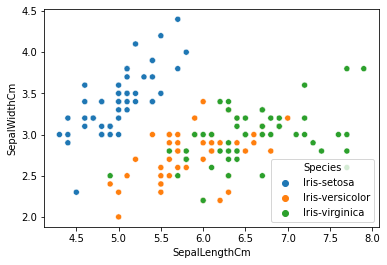

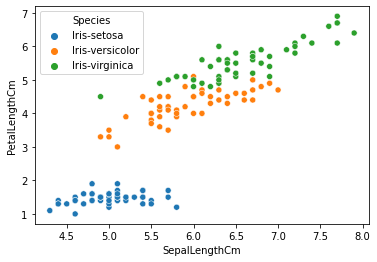

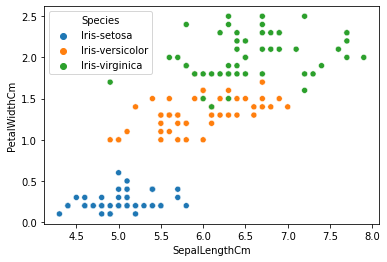

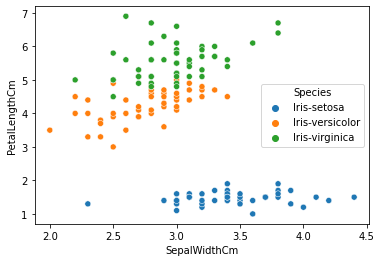

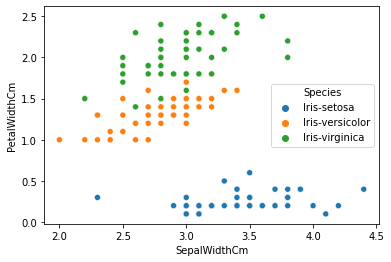

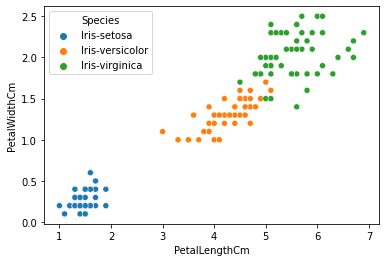

In [ ]:
for i in range(len(df.columns)-1):
  for j in range(i+1, len(df.columns)-1):
    x_label = df.columns[i]
    y_label = df.columns[j]
    sns.scatterplot(x=x_label, y=y_label, data=df, hue='Species')
    plt.show()

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

In [ ]:
train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
12,4.8,3.0,1.4,0.1,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
119,6.0,2.2,5.0,1.5,Iris-virginica
...,...,...,...,...,...
20,5.4,3.4,1.7,0.2,Iris-setosa
128,6.4,2.8,5.6,2.1,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica


In [ ]:
def dataset(dataframe):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  data = np.hstack((x,np.reshape(y,(len(y),1))))
  return data,x,y

In [ ]:
train, x_train, y_train = dataset(train)
valid, x_valid, y_valid = dataset(valid)
test, x_test, y_test = dataset(test)

#kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=8)

In [ ]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00         6
 Iris-virginica       1.00      1.00      1.00         4

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[5 0 0]
 [0 6 0]
 [0 0 4]]


In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 1.0
